In [16]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans

In [17]:
#Reading the required dataset 
df=pd.read_csv('Iris.csv')

In [18]:
df.head()
#shows the first 5 rows of dataset 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.tail()
#shows the last 5 rows of dataset 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
df.shape
#tells the number rows and columns in the dataset 

(150, 6)

In [21]:
df.columns
#shows the fields of the columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
df['Species'].unique()
#shows the the specified column 'Species'

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
df.info()
#shows the basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
df.describe()
#shows some basic statistical details

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
#since this is an unsupervised machine learning project, we will drop the label columns 
iris=pd.DataFrame(df)
iris_df=iris.drop(columns= ['Id','Species'])


In [26]:
#now we will check if the command ran properly 
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
#now we will calculate the optimal number of clusters as it determines into how many clusters the data must be clustered 
#There are two methods : Direct and Statistical methods. We will be using the Direct Elbow Method as it is easier to implement.
range_clusters=range(1,15)
avg_distance=[]    #average distance between clusters 
for k in range_clusters:
    kd=KMeans(n_clusters=k).fit(iris_df)
    avg_distance.append(kd.inertia_)

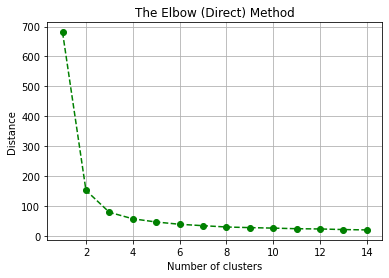

In [30]:
plt.plot(range_clusters,avg_distance, 'go--', color='green')
plt.title('The Elbow (Direct) Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [32]:
#With an increase in the number of clusters (k), the average distance decreases.
#To find the optimal number of clusters (k), observe the plot and find the value of k for which there is a sharp and steep fall of the distance. 
#This is will be an optimal point of k where an elbow occurs.
#it is clear from the graph that k=2 or 3 , we will go with the k=3. 
from sklearn.cluster import KMeans

In [33]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = None)
predictions = model.fit_predict(iris_df)

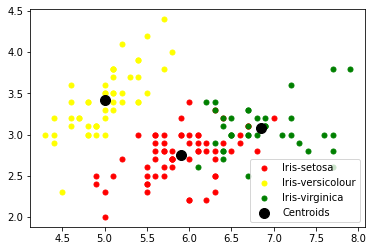

In [35]:
#now we will visualise the clusters 
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()

In [36]:
#this is the cluster visualisation of the given dataset. 